Problem 2

In [1]:
import numpy as np
import scipy as sp
from numpy.random import randn
from scipy.linalg import orth
from scipy.sparse.linalg import svds
from numpy.linalg import norm
import math
import time

In [2]:
def cal_A(m,n,r):
    X = orth(randn(m,m))
    Y = orth(randn(n,m))
    d_one = [r - i + 1 for i in range(1,r + 1)]
    d_two = [4*0.001 for i in range(r + 1, m + 1)]
    d = d_one + d_two
    D = np.diag(d)
    return np.matmul(np.matmul(X,D),Y.T)
    

In [3]:
def do_svd(A,r):
    start = time.time()
    U,D,V = svds(A,k = r)
    end = time.time()
    return U,D,V, (end - start)

def get_Ur_dr(A,c,r):
    col_p = ((norm(A,ord = 2, axis = 0))**2)/norm(A)**2
    col_c = range(0,A.shape[1])
    col_dra  = np.random.choice(col_c, c, p = col_p)
    M = A[:,col_dra]
    #print(M.shape)
    if c == r:
        Ur_dr, D_dr, Vr_dr = sp.linalg.svd(M,full_matrices=False)
    else:
        Ur_dr, D_dr, Vr_dr = svds(M, k = r)
    return Ur_dr

def get_Vr_dr(A,c,r):
    row_p = ((norm(A,ord = 2, axis = 1))**2)/norm(A)**2
    row_c = range(0,A.shape[0])
    row_dra = np.random.choice(row_c, c, p = row_p)
    M = A[row_dra,:]
    #print(M.shape)
    if c == r:
        Ur_dr, D_dr, Vr_dr = sp.linalg.svd(M,full_matrices=False)
    else:
        Ur_dr, D_dr, Vr_dr = svds(M, k = r)
    return Vr_dr

def power_method(m):
    par = np.random.rand(m.shape[0])
    par = par[:,np.newaxis]
    for itera in range(100):
        m_par = np.dot(m.T,par)
        m_ori = np.dot(m, m_par)
        
        m_ori_norm = np.linalg.norm(m_ori)
        
        par = m_ori/m_ori_norm
    
    return np.dot(par.T, np.dot(m, np.dot(m.T,par)))

def power_method_re(m_dr,m):
    par = np.random.rand(m.shape[0])
    par = par[:,np.newaxis]
    for itera in range(100):
        m_dr_par = np.dot(m_dr, m_dr.T)
        m_par = np.dot(m,m.T)
        
        m_diff = np.dot((m_dr_par - m_par),par)
        
        m_diff_norm = np.linalg.norm(m_diff)
        
        par =  m_diff/m_diff_norm
    
    ori = np.dot(m,m.T)
    dr = np.dot(m_dr, m_dr.T)
    return np.dot(par.T, np.dot((dr - ori),par))
    

In [5]:
A = cal_A(1000, 100000, 10)

In [7]:
A.shape

(1000, 100000)

In [8]:
A_1 = A[:,:1000]

In [9]:
A_1.shape

(1000, 1000)

In [11]:
data_shape = [500,1500,3000,5000,8000]
time_normal = []
time_rand = []


In [12]:
eps_sum = [0.05]

A_1 = cal_A(1000, 100000, 10)
r = 10
for shape in data_shape:
    for eps in eps_sum:
        A = A_1[:,:shape]
        start = time.time()
        U_r,D,V_r,SVD_TIME = do_svd(A,r)
        end = time.time()
        print("The time period of SVD on A: ", end - start)
        time_normal.append(end - start)
        c = 25
        U_error = 0
        V_error = 0
        it_start = time.time()
        for i in range(10):
            Ur_dr = get_Ur_dr(A,c,r)
            Vr_dr = get_Vr_dr(A,c,r)
            Udiff_error = norm((np.dot(Ur_dr,Ur_dr.T) - np.dot(U_r,U_r.T)), ord = 2)
            Vdiff_error = norm((np.dot(Vr_dr,Vr_dr.T) - np.dot(V_r,V_r.T)), ord = 2)
            U_error += Udiff_error
            V_error += Vdiff_error
        it_end = time.time()
        #print(U_error/10)
        #print(V_error/10)
        #print(c)
        if( (U_error/10 <= eps) and (V_error/10 <= eps)):
            print('r = {}, c ={}, eps = {}, u_error ={}, v_error = {}'.format(r,c,eps,U_error/10, V_error/10))
            print("Average runtime (over the 10 random draws): ",(it_end - it_start)/10)
            time_rand.append((it_end - it_start)/10)
            break

The time period of SVD on A:  0.04660511016845703
r = 10, c =25, eps = 0.05, u_error =0.034604529284251125, v_error = 5.583126897101416e-15
Average runtime (over the 10 random draws):  0.15005311965942383
The time period of SVD on A:  0.19117403030395508
r = 10, c =25, eps = 0.05, u_error =0.03638804992398696, v_error = 7.391659312061107e-15
Average runtime (over the 10 random draws):  0.1503972053527832
The time period of SVD on A:  0.36197376251220703
r = 10, c =25, eps = 0.05, u_error =0.031774364589970495, v_error = 4.9449739634332e-15
Average runtime (over the 10 random draws):  0.16217358112335206
The time period of SVD on A:  0.6234641075134277
r = 10, c =25, eps = 0.05, u_error =0.032862583097057765, v_error = 7.869039733539655e-15
Average runtime (over the 10 random draws):  0.1886751174926758
The time period of SVD on A:  0.9756457805633545
r = 10, c =25, eps = 0.05, u_error =0.030768804278287543, v_error = 7.301004108996271e-15
Average runtime (over the 10 random draws):  0.

In [13]:
time_normal

[0.04660511016845703,
 0.19117403030395508,
 0.36197376251220703,
 0.6234641075134277,
 0.9756457805633545]

In [14]:
time_rand

[0.15005311965942383,
 0.1503972053527832,
 0.16217358112335206,
 0.1886751174926758,
 0.2118084192276001]

<IPython.core.display.Javascript object>


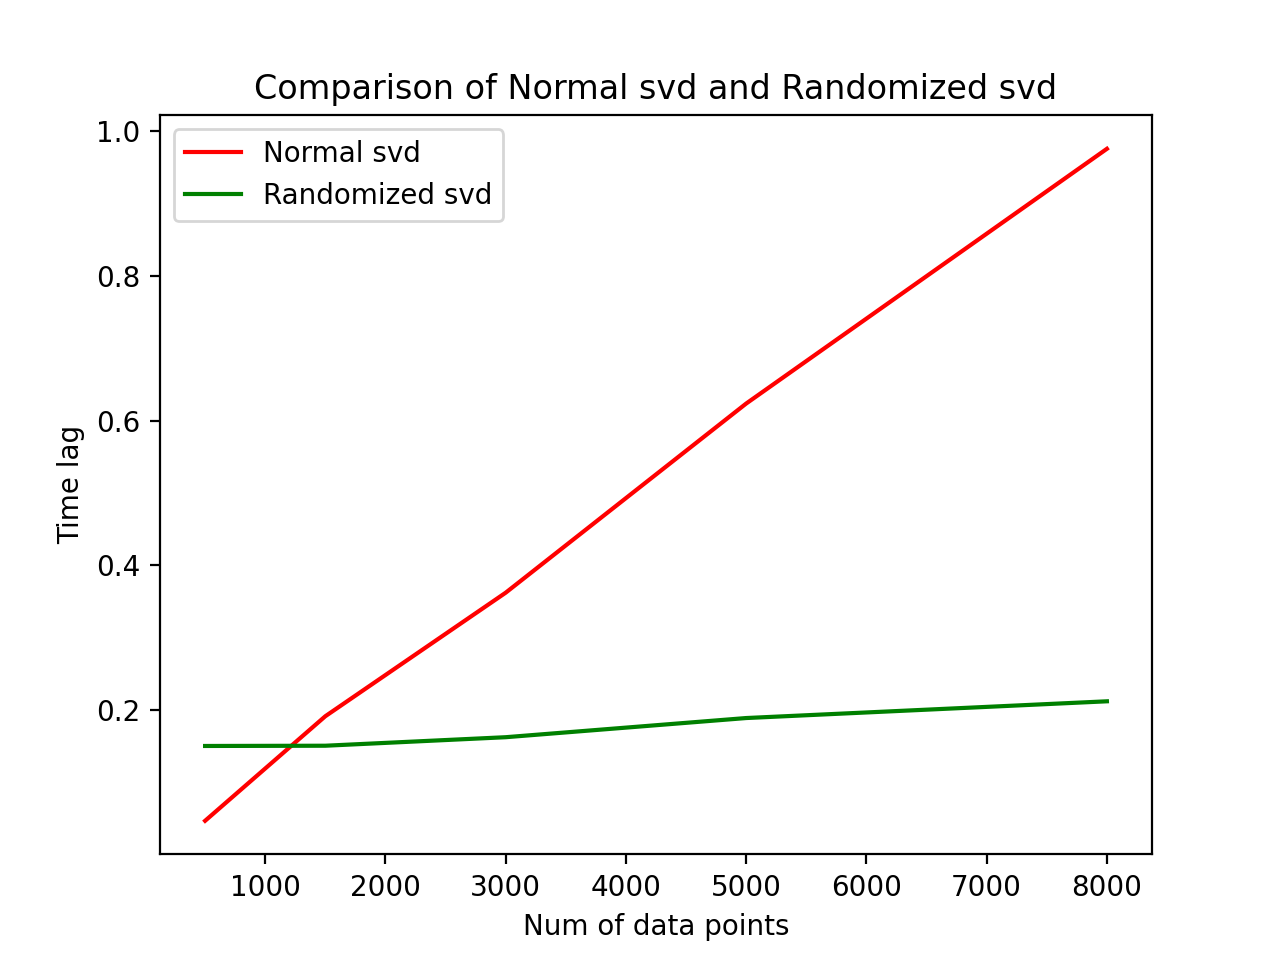

In [15]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib notebook
x = range(500)
plt.plot(data_shape,time_normal,color = 'r', label = 'Normal svd')
plt.plot(data_shape,time_rand, color = 'g', label = 'Randomized svd')
plt.legend()
plt.title("Comparison of Normal svd and Randomized svd")
plt.xlabel("Num of data points")
plt.ylabel("Time lag")
plt.show()